In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [25]:
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()
# selling price bizim target sutunumuz olacak.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


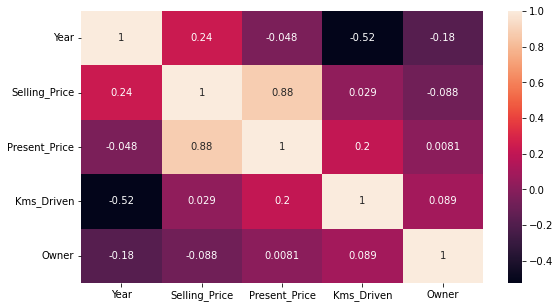

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df["vehicle_age"]=2021-df.Year

In [9]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [10]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

### Dummies : 

In [11]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.59,27000,Petrol,Dealer,Manual,0,7
1,9.54,43000,Diesel,Dealer,Manual,0,8
2,9.85,6900,Petrol,Dealer,Manual,0,4
3,4.15,5200,Petrol,Dealer,Manual,0,10
4,6.87,42450,Diesel,Dealer,Manual,0,7


In [12]:
X = pd.get_dummies(data = X, columns=["Fuel_Type", "Seller_Type", "Transmission"], drop_first=True)

In [13]:
X.head()

,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


### İmport Sklearn Library : 

In [15]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

### Metrics funcation : 

In [18]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Default Value Model :

In [19]:
dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [20]:
train_val(dt_model, X_train, y_train, X_test, y_test)

# train setimiz mükemmel değerler aldı. biraz overfiting durumu var.

,train,test
R2,1.0,0.932991
mae,0.0,0.506066
mse,0.0,0.643877
rmse,0.0,0.802419


In [22]:
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.881360
test_neg_mean_absolute_error       -0.783958
test_neg_mean_squared_error        -4.184845
test_neg_root_mean_squared_error   -1.565832
dtype: float64

### Feature İmportance : 

In [23]:
dt_model.feature_importances_

array([8.89916597e-01, 1.54159593e-02, 4.47945300e-18, 8.99709459e-02,
       3.01586455e-03, 2.26569847e-04, 2.47325838e-04, 1.20673719e-03])

In [26]:
df_feature_imp = pd.DataFrame(index= X.columns, data = dt_model.feature_importances_,
                             columns= ["Feature_İmportance"]).sort_values("Feature_İmportance")

df_feature_imp

,Feature_İmportance
Owner,0.000
Fuel_Type_Petrol,0.000
Seller_Type_Individual,0.000
Transmission_Manual,0.001
Fuel_Type_Diesel,0.003
Kms_Driven,0.015
vehicle_age,0.090
Present_Price,0.890


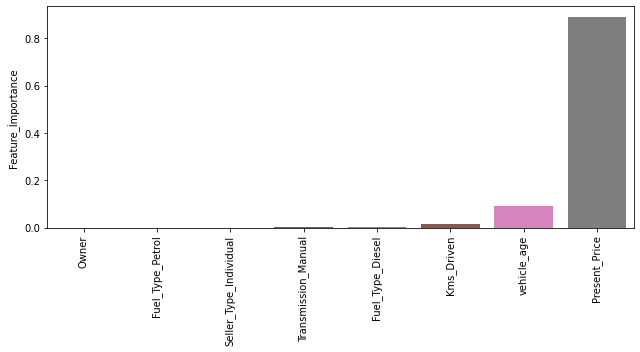

In [27]:
sns.barplot(x = df_feature_imp.index, y = "Feature_İmportance", data = df_feature_imp)
plt.xticks(rotation = 90)
plt.tight_layout()

### en fazla targeta etkisi olan futureyi düşürerek skorlara bakalım : 

In [29]:
X2 = X.drop(columns = ["Present_Price"]) 
# yeni dataframe oluşturduk ve en önemli futuremizi düşürdük.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)
dt_model2 = DecisionTreeRegressor(random_state=101)
dt_model2.fit(X_train2, y_train2)

train_val(dt_model2, X_train2, y_train2, X_test2, y_test2)

# skorlar berbat çıktı o halde düşürmeden devam 

,train,test
R2,0.998,-0.650
mae,0.038,1.948
mse,0.070,16.375
rmse,0.264,4.047


In [31]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

### DecisionTree Regresyon için parametreler : 

#### criterion : 

mse yi 0 değerine yaklaştırmaya çalışırız. mse bize varyansı göstermektedir. burda ayrımı fiyatları birbirlerine yakın olan arabalara göre yapacak. Default olarak mse değerlerine göre ayrım yapar.

#### Max_depth : 

en önemli parametredir. classifier gibi ağacın dallanma sayısını belirtir. 

### GridSearchCV best parametres : 

In [32]:
model = DecisionTreeRegressor(random_state=101)

param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9],
             'criterion' : ["mse", "rmse"],
             'ccp_alpha' : np.linspace(0,5,20)}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]),
                         'criterion': ['mse', 'rmse'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [35]:
grid_model.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [33]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991,0.902
mae,0.323,0.569
mse,0.260,0.940
rmse,0.510,0.970


In [36]:
train_val(dt_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.933
mae,0.000,0.506
mse,0.000,0.644
rmse,0.000,0.802


### Final Model : 

In [45]:
y_pred = grid_model.predict(X_test)

my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test - y_pred }
compare = pd.DataFrame(my_dict)

In [46]:
compare.sample(17)

,Actual,Pred,Residual
70,3.950,4.015,-0.065
39,2.250,2.075,0.175
295,8.550,11.567,-3.017
154,0.500,0.499,0.001
189,0.200,0.244,-0.044
266,3.650,4.015,-0.365
150,0.500,0.499,0.001
171,0.400,0.427,-0.027
176,0.350,0.499,-0.149
241,4.750,4.407,0.343


In [48]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
13,6.100,5.488,0.612
234,5.500,5.488,0.012
78,5.250,4.000,1.250
194,0.200,0.499,-0.299
154,0.500,0.499,0.001
231,9.250,7.900,1.350
171,0.400,0.427,-0.027
153,0.500,0.499,0.001
202,4.400,5.488,-1.088
285,7.400,7.900,-0.500


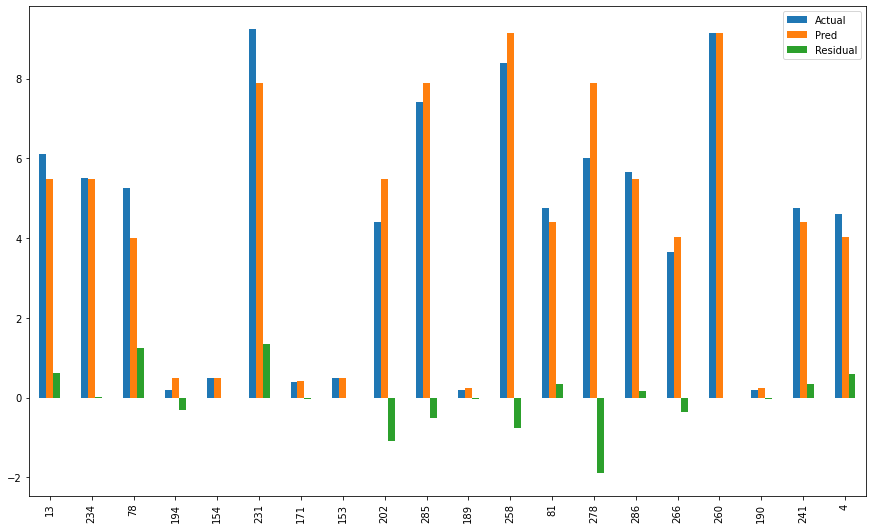

In [49]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()